# Import Library

In [1]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 주피터 노트북을 위한 변수 관리 dictionary

In [ ]:
Setting={
    "sample_image_path" : '/content/sample_image.png',
    "sticker_path": '/content/crown.png'
}

In [2]:
VARIABLE_Collector = {
    "image_size":(640, 640),
    "image": None,
    "tem_image":None,
    "face_position":None
}

주파터 노트북의 경우 변수들이 전역 선언이 되어 버려 변수들이 중간에 변경되어 의도치 못한 동작을 일이키기도 합니다.
이 노트북에서는 dictionary를 활용하여 변수를 통합관리하겠습니다!

# 사진을 띄워봅시다!

In [3]:
def convert_image(path: str):
    img_bgr = cv2.imread(path)    # OpenCV로 이미지 읽기
    img_bgr = cv2.resize(img_bgr, VARIABLE_Collector['image_size'])    # 640x640 크기로 리사이즈
    img_show = img_bgr.copy()     # 출력용 이미지 별도 보관

    # OpenCV는 BGR 순서이므로, RGB로 변환하여 Matplotlib으로 출력
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

In [4]:
def display_image(img_rgb):
    plt.imshow(img_rgb)           # RGB로 변환한 이미지 출력
    plt.show()

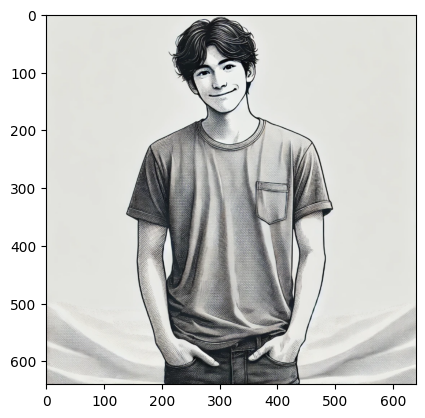

In [5]:
VARIABLE_Collector['image'] = convert_image(Setting['sample_image_path'])
display_image(VARIABLE_Collector['image'])

# 얼굴 위치를 추출해 볼까요?

In [6]:
def get_bounding_box(image_rgb):
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(image_rgb, 1)   #- (image, num of img pyramid)
    return dlib_rects # left(), top(), right(), bottom()

In [7]:
VARIABLE_Collector['face_position'] = get_bounding_box(VARIABLE_Collector['image'])
print(VARIABLE_Collector['face_position'])

rectangles[[(247, 68) (354, 175)]]


In [8]:
def get_face_position(image_rgb, dlib_rects):
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        # width와 height 계산
        w = r - l  # 너비
        h = b - t  # 높이
    return (l, t), (r, b), (w, h)

In [9]:
def draw_face_marker(image, start, end):
    VARIABLE_Collector['tem_image'] = image.copy()

    cv2.rectangle(VARIABLE_Collector['tem_image'], start, end, (0, 255, 0), 2, lineType=cv2.LINE_AA)

    img_show_rgb = cv2.cvtColor(VARIABLE_Collector['tem_image'], cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

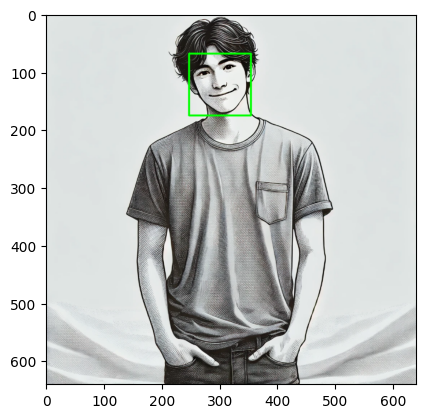

In [10]:
pos_start, pos_end, size = get_face_position(VARIABLE_Collector['image'], VARIABLE_Collector['face_position'])
draw_face_marker(VARIABLE_Collector['image'], pos_start, pos_end)

# 이제 이미지에 무언가를 추가해봅시다!

In [11]:
def paint_circle_to_image(image, point_list, circle_size):
    for idx, point in enumerate(list_points):
        cv2.circle(image, point, circle_size, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

In [12]:
list_points = [(100,100),(150,150)]

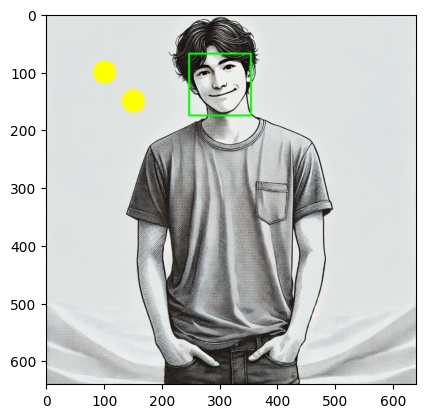

In [13]:
paint_circle_to_image(VARIABLE_Collector['tem_image'], list_points, 20)

# 이제 스티커를 붙여 보겠습니다!

In [15]:
def load_sticker(path:str):
    img_sticker = cv2.imread(path)
    img_sticker = cv2.resize(img_sticker, (100, 100))  # 스티커 크기를 30x30으로 줄임
    print(img_sticker.shape)
    return img_sticker

In [17]:
def calculate_sticker_area(image, sticker, start_position):
    refined_x = max(0, start_position[0] - img_sticker.shape[1] // 2)  # left
    refined_y = max(0, start_position[1] - img_sticker.shape[0])       # top

    sticker_h, sticker_w = img_sticker.shape[:2]

    return refined_x, refined_y, sticker_h, sticker_w

In [16]:
img_sticker = load_sticker(Setting['sticker_path'])

(100, 100, 3)


In [18]:
refined_x, refined_y, sticker_h, sticker_w = calculate_sticker_area(VARIABLE_Collector['tem_image'], img_sticker, pos_start)

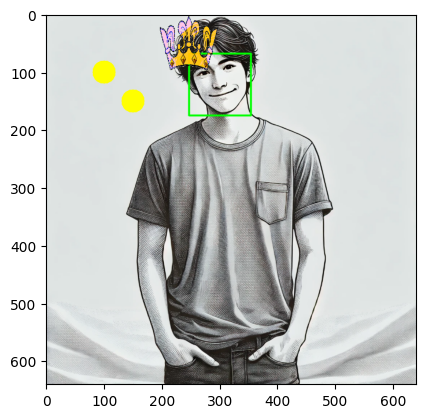

In [19]:
sticker_area = VARIABLE_Collector['tem_image'][refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w]

# 원본 이미지에 스티커를 적용
VARIABLE_Collector['tem_image'][refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(VARIABLE_Collector['tem_image'], cv2.COLOR_BGR2RGB))
plt.show()

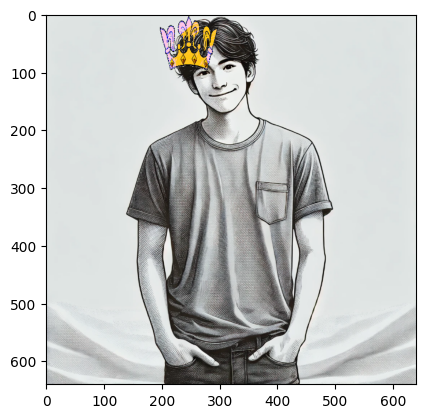

In [21]:
# bounding box와 landmark를 제거
sticker_area = VARIABLE_Collector['image'][refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
VARIABLE_Collector['image'][refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(VARIABLE_Collector['image'], cv2.COLOR_BGR2RGB))
plt.show()